## Consigna

El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga unbuen desempeño comparado con proyectos previos realizados sobre este dataset. Luego, interpretare ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?

#### El trabajo se organiza en tres partes:

### PARTE A - Transformación de Datos


* Detección y eliminación de Outliers

* Encoding

* Imputación de valores faltantes

* Escalado de datos

* Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Volver a entrenar el modelo implementado en el proyecto anterior - en particular, el árbol de decisión - con este nuevo dataset transformado . Evaluare su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Comparare con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intentare explicar a qué se debe.

### PARTE B - Modelos Avanzados

* Elegire tres de los modelos avanzados que se aplicar. Comparare con el desempeño obtenido en el proyecto anterior. Entrénar los modelos y evalúarlos con sus argumentos por defecto.

* Optimizar sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

* Comparar el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegiría? Justificar.

### PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, respondere algunas o todas las siguientes preguntas:

¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si use una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

### DESAFÍO OPCIONAL

Aplicar una técnica de Clustering sobre el dataset. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')
import seaborn as sns


In [7]:
#from google.colab import drive
#drive.mount('/content/drive')


In [8]:
df_original=pd.read_csv('C:/Users/Octavio/Documents/CURSOS/DATA SCIENCE/Proyecto/DS_Proyecto_01_Datos_Properati.csv')
propiedades=df_original
propiedades.head()

start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price currency  \
0          140.0            140.0  153000.0      USD   
1           70.0             58.0  159000.0      USD   
2           45.0             45.0  125000.0      USD   
3           85.0             50.0  295000.0      USD   
4           50.0             35.0   40000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
4  58 entre 1 y 2  Venta de departamento en ph.1 ...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
4  58 entre 1 y 2  Venta de departamento en PH. P...            PH   

  operation_type  
0          Venta  
1          Venta  
2          Venta  
3          Venta  
4          Venta

## PARTE A - Transformación de Datos

### Valores Faltantes

In [9]:
propiedades.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

**MAR con respecto a `price`**

A price lo acotamos con el criterio de tres veces el desvio estandar

Lo hacemos con esta variable ya que es la que mas nos importa porque es la que vamos a predecir

In [10]:
propiedades['price_intervalos']= pd.cut(propiedades['price'][propiedades['price']<propiedades['price'].mean()+3*propiedades['price'].std()],15)


In [11]:
contar_val=propiedades.price_intervalos.value_counts()
df_contar=pd.DataFrame(contar_val)
df_contar=df_contar.reset_index()
df_contar.columns=df_contar.columns=['intervalos','conteo']
df_contar.sort_values(by='intervalos',inplace=True)
df_contar=df_contar.reset_index()
df_contar

index              intervalos  conteo
0       3       (4310.5, 84800.0]   16778
1       0     (84800.0, 164100.0]   54771
2       1    (164100.0, 243400.0]   32226
3       2    (243400.0, 322700.0]   17409
4       4    (322700.0, 402000.0]    9378
5       5    (402000.0, 481300.0]    4473
6       6    (481300.0, 560600.0]    2784
7       7    (560600.0, 639900.0]    1795
8       8    (639900.0, 719200.0]    1389
9       9    (719200.0, 798500.0]    1167
10     10    (798500.0, 877800.0]     677
11     11    (877800.0, 957100.0]     573
12     12   (957100.0, 1036400.0]     372
13     13  (1036400.0, 1115700.0]     304
14     14  (1115700.0, 1195000.0]     229

In [12]:
##AHORA VER COMO USO ESTE DF PARA DIVIDIR EL CONTEO DE LOS NULL SIN USAR MERGE
null_bthvsprice=propiedades.bathrooms.isnull().groupby([propiedades['price_intervalos']]).sum().astype(int).reset_index(name='count_null')
null_bthvsprice['conteo_intervalos']=df_contar.conteo
null_bthvsprice['null/cantidad_valores']=null_bthvsprice['count_null']/null_bthvsprice['conteo_intervalos']
null_bthvsprice

price_intervalos  count_null  conteo_intervalos  \
0        (4310.5, 84800.0]        1361              16778   
1      (84800.0, 164100.0]        2004              54771   
2     (164100.0, 243400.0]        1014              32226   
3     (243400.0, 322700.0]         517              17409   
4     (322700.0, 402000.0]         332               9378   
5     (402000.0, 481300.0]         140               4473   
6     (481300.0, 560600.0]         106               2784   
7     (560600.0, 639900.0]          57               1795   
8     (639900.0, 719200.0]          49               1389   
9     (719200.0, 798500.0]          42               1167   
10    (798500.0, 877800.0]          46                677   
11    (877800.0, 957100.0]          36                573   
12   (957100.0, 1036400.0]          24                372   
13  (1036400.0, 1115700.0]          11                304   
14  (1115700.0, 1195000.0]           8                229   

    null/cantidad_valores  
0                0.081118  
1                0.036589  
2                0.031465  
3                0.029697  
4                0.035402  
5                0.031299  
6                0.038075  
7                0.031755  
8                0.035277  
9                0.035990  
10               0.067947  
11               0.062827  
12               0.064516  
13               0.036184  
14               0.034934

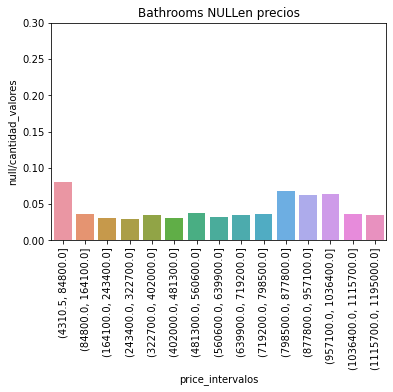

In [13]:
plt.title('Bathrooms NULLen precios')
sns.barplot(data=null_bthvsprice,x='price_intervalos',y='null/cantidad_valores')
plt.ylim([0,0.30])
plt.xticks(rotation=90)
plt.show()

In [14]:
null_surftvsprice=propiedades.surface_total.isnull().groupby([propiedades['price_intervalos']]).sum().astype(int).reset_index(name='count_null')
null_surftvsprice['conteo_intervalos']=df_contar.conteo
null_surftvsprice['null/cantidad_valores']=null_surftvsprice['count_null']/null_surftvsprice['conteo_intervalos']
null_surftvsprice

price_intervalos  count_null  conteo_intervalos  \
0        (4310.5, 84800.0]        3672              16778   
1      (84800.0, 164100.0]        7952              54771   
2     (164100.0, 243400.0]        3730              32226   
3     (243400.0, 322700.0]        2025              17409   
4     (322700.0, 402000.0]        1136               9378   
5     (402000.0, 481300.0]         587               4473   
6     (481300.0, 560600.0]         342               2784   
7     (560600.0, 639900.0]         197               1795   
8     (639900.0, 719200.0]         159               1389   
9     (719200.0, 798500.0]         154               1167   
10    (798500.0, 877800.0]          97                677   
11    (877800.0, 957100.0]          77                573   
12   (957100.0, 1036400.0]          52                372   
13  (1036400.0, 1115700.0]          42                304   
14  (1115700.0, 1195000.0]          19                229   

    null/cantidad_valores  
0                0.218858  
1                0.145186  
2                0.115745  
3                0.116319  
4                0.121135  
5                0.131232  
6                0.122845  
7                0.109749  
8                0.114471  
9                0.131962  
10               0.143279  
11               0.134380  
12               0.139785  
13               0.138158  
14               0.082969

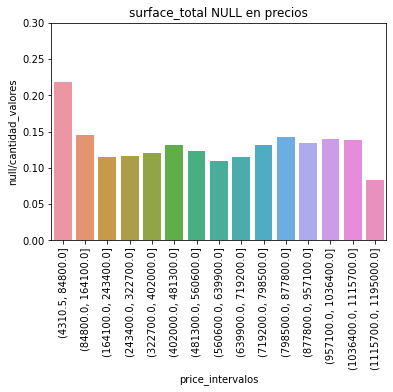

In [15]:
plt.title('surface_total NULL en precios')

sns.barplot(data=null_surftvsprice,x='price_intervalos',y='null/cantidad_valores')
plt.ylim([0,0.30])
plt.xticks(rotation=90)
plt.show()

In [16]:
null_surfcvsprice=propiedades.surface_covered.isnull().groupby([propiedades['price_intervalos']]).sum().astype(int).reset_index(name='count_null')
null_surfcvsprice['conteo_intervalos']=df_contar.conteo
null_surfcvsprice['null/cantidad_valores']=null_surfcvsprice['count_null']/null_surfcvsprice['conteo_intervalos']
null_surfcvsprice

price_intervalos  count_null  conteo_intervalos  \
0        (4310.5, 84800.0]        3923              16778   
1      (84800.0, 164100.0]        8234              54771   
2     (164100.0, 243400.0]        3928              32226   
3     (243400.0, 322700.0]        2139              17409   
4     (322700.0, 402000.0]        1200               9378   
5     (402000.0, 481300.0]         629               4473   
6     (481300.0, 560600.0]         372               2784   
7     (560600.0, 639900.0]         218               1795   
8     (639900.0, 719200.0]         180               1389   
9     (719200.0, 798500.0]         166               1167   
10    (798500.0, 877800.0]         111                677   
11    (877800.0, 957100.0]          82                573   
12   (957100.0, 1036400.0]          55                372   
13  (1036400.0, 1115700.0]          45                304   
14  (1115700.0, 1195000.0]          20                229   

    null/cantidad_valores  
0                0.233818  
1                0.150335  
2                0.121889  
3                0.122867  
4                0.127959  
5                0.140622  
6                0.133621  
7                0.121448  
8                0.129590  
9                0.142245  
10               0.163959  
11               0.143106  
12               0.147849  
13               0.148026  
14               0.087336

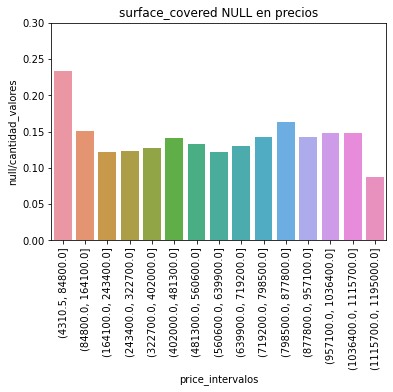

In [17]:
plt.title('surface_covered NULL en precios')
sns.barplot(data=null_surfcvsprice,x='price_intervalos',y='null/cantidad_valores')
plt.xticks(rotation=90)
plt.ylim([0,0.30])
plt.show()

Al hacer los el count de los Nan divido por el count de los intervalos del precio en el DF propiedades nos devuelve algo parecido a una distribucion uniforme, sin ninguna tendencia clara.
Esto lo vemos porque las distribuciones de los NAN y de la variable price acotada es similar

### Ahora Filtramos Variable Categoricas

Hacemos esto para ya utilizar el Dataset con las categorias que nos interesan y hacer el analisis de Outliers con el Dataset que nos incumbe

**Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset?

¿De qué regiones son las publicaciones?  Gráficos de barras para las variables `l2` y `l3`. 

Text(0, 0.5, 'Cantidad de Datos')

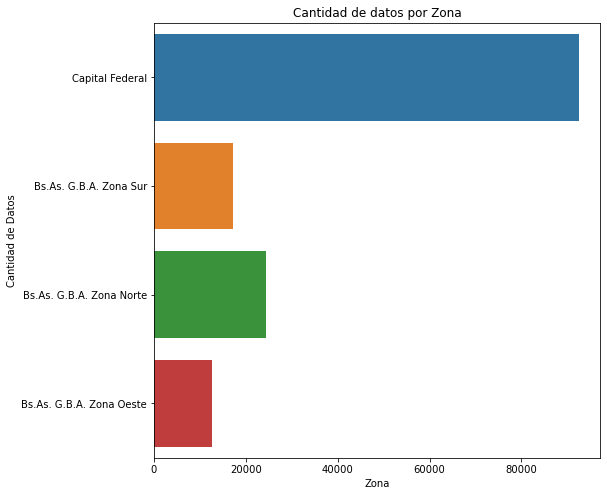

In [19]:
plt.figure(figsize = (8,8))

#plt.subplot(1,2,1)
sns.countplot(data=propiedades,y='l2')
plt.title('Cantidad de datos por Zona')
plt.xlabel('Zona')
plt.ylabel('Cantidad de Datos')


Para graficar las localidades 3 que son muchas creamos una columna nueva donde los valores que estan despues de un determinado percentil los cambiamos por 'otros'

In [20]:
localidades=propiedades['l3'].value_counts()
localidades

89


Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: l3, Length: 89, dtype: int64

In [21]:
percentil_localidades=np.percentile(localidades,80) #Definimos Percentil en este caso es el 80%
otros=localidades[localidades<=percentil_localidades] #Filtramos segun percentil para definir categoria "Otros"

a=localidades[localidades<=percentil_localidades].size
filtro_l3=propiedades['l3'].value_counts().iloc[-a:].index

propiedades['l3_countplot']=propiedades['l3'] #Creo nueva columna para graficar con valor "Otros"


propiedades['l3_countplot'][propiedades['l3_countplot'].isin(filtro_l3)]='Otros'

Creamos columna nueva que utilizaremos para los graficos

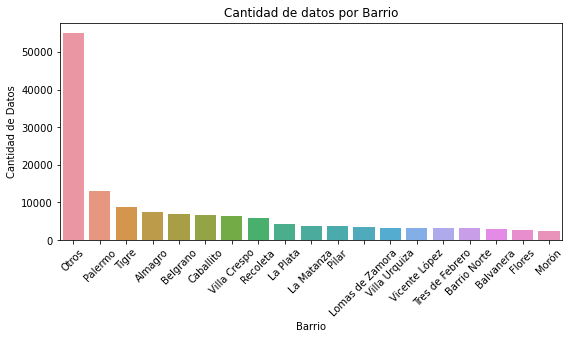

In [22]:
plt.figure(figsize = (9,4))
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
sns.countplot(data=propiedades, x='l3_countplot',dodge=True ,order=propiedades.l3_countplot.value_counts().iloc[:].index,) 
plt.title('Cantidad de datos por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Cantidad de Datos')
plt.show()
propiedades.drop('l3_countplot',axis=1,inplace=True)

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [24]:
tipos=np.array(['PH','Departamento' , 'Casa'])
mascara=np.logical_and(propiedades.l2 == 'Capital Federal', propiedades.property_type.isin(tipos))
data=propiedades[mascara]

In [25]:
data.shape

(91485, 20)

### Outliers
Las variables cuantitativas a analizar son:

* **Precios**
*  Surface Total and Surface Covered 
* Bathrooms, Rooms, BedRooms


Visualizamos para identificar Outliers y aplicamos algun criterio: Las 3 sigmas, rango intercuartilico o un criterio arbitrario

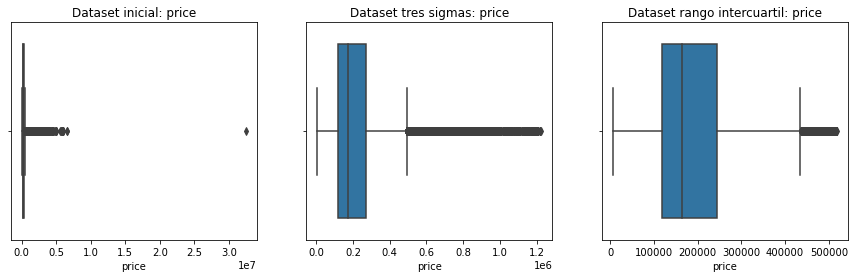

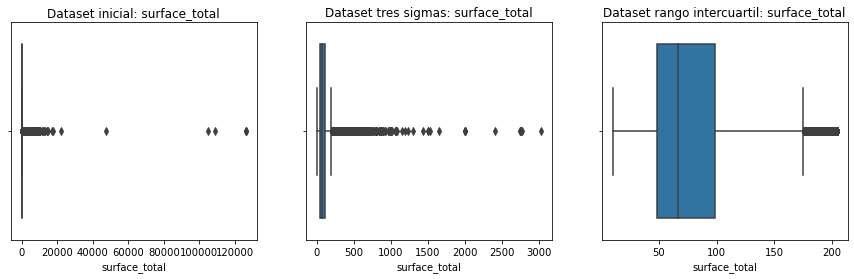

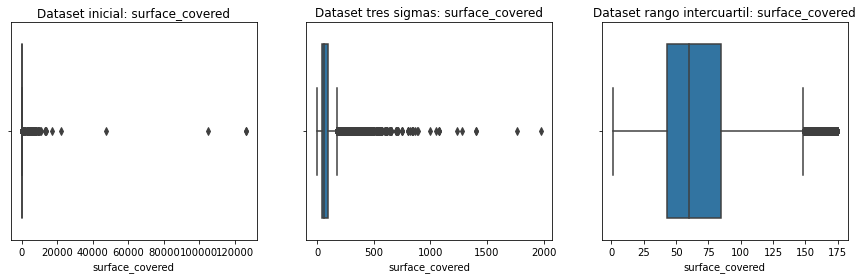

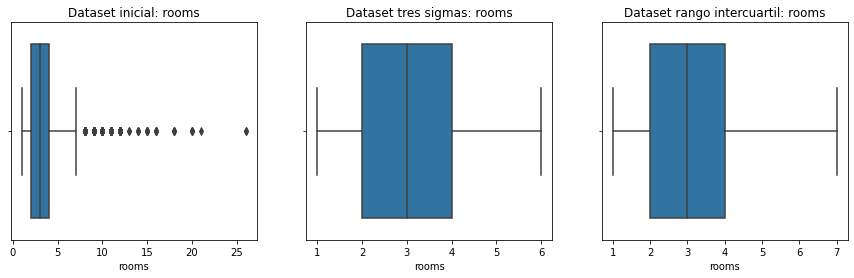

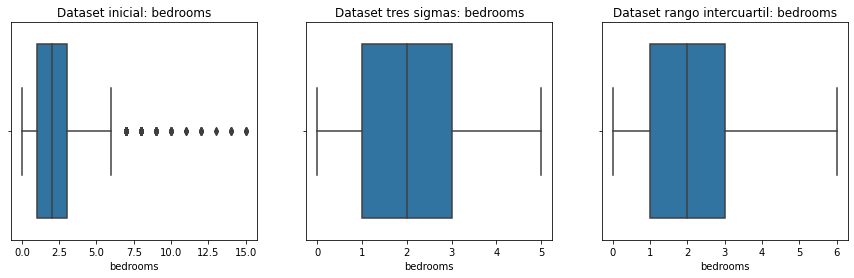

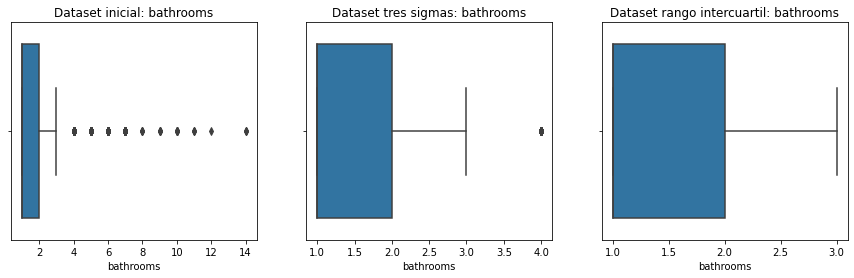

In [26]:
for var in ['price','surface_total','surface_covered','rooms','bedrooms','bathrooms',]:
    plt.figure(figsize=[15,4])

    plt.subplot(1,3,1)

    plt.title(f'Dataset inicial: {var}',)
    sns.boxplot(data[var])

    plt.subplot(1,3,2)

    plt.title(f'Dataset tres sigmas: {var}')
    sns.boxplot(data[var][data[var]<=data[var].mean()+3*data[var].std()])

    plt.subplot(1,3,3)

    plt.title(f'Dataset rango intercuartil: {var}')

    q25,q75 = np.percentile(data[var].dropna(), [25,75])
    iqr=q75-q25
    minimo = q25 - 1.5*iqr
    maximo = q75 + 1.5*iqr

    sns.boxplot(data[var][data[var]<=maximo])


    plt.show()


- **price:** Vemos que el criterio de las tres sigmas es mas abarcativo, y teniendo en cuenta que el dataset proviene de Buenos Aires sabemos que el rango de precios de las propiedades es muy grande entonces usamos este.
- **Surface total:** En este caso utilizaremos el criterio medio de 800m2 ya
que vemos que en el caso de las 3 sigmas se siguen observando Outliers 
- **Surface Covered:** 400 m2 (criterio en el medio)
- **Rooms:** maximo = 7 Rango Intercuartilico
- **BedRooms:** maximo = 6 Rango Intercuartilico
- **BathRooms:** maximo = 4 Tres Sigmas 

In [27]:
data.shape

(91485, 20)

In [28]:
mask_price=np.logical_or(data['price'].isnull(),data['price']<=data['price'].mean()+3*data['price'].std()) #tres sigmas
mask_st=np.logical_or(data['surface_total'].isnull(),data['surface_total']<=1000)
mask_sc=np.logical_or(data['surface_covered'].isnull(),  data['surface_covered']<=400)
mask_rooms=np.logical_or(data['rooms'].isnull(),  data['rooms']<=7)
mask_bedrooms=np.logical_or(data['bedrooms'].isnull(),   data['bedrooms']<=6)
mask_bathrooms=np.logical_or(data['bathrooms'].isnull(), data['bathrooms']<=4)


In [29]:
mask1=np.logical_and(mask_price , mask_st)
mask2=np.logical_and(mask1 , mask_sc)
mask3=np.logical_and(mask2 ,mask_rooms)
mask4=np.logical_and(mask3,mask_bedrooms)
mask5=np.logical_and(mask4,mask_bathrooms)

In [30]:
data1=data[mask5]

**Surface_Covered**

El criterio a utilizar podria ser primero que surface covered siempre tiene que ser menor a surface total, ya que una casa no puede tener mas superficie cubierta que total.

In [31]:
data2=data1[data1['surface_covered']<=data1['surface_total']]

In [32]:
data[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].describe()


rooms      bedrooms     bathrooms  surface_total  \
count  91485.000000  91485.000000  89314.000000   82568.000000   
mean       2.964278      1.960278      1.560147     112.626369   
std        1.314704      1.072946      0.860309     980.713664   
min        1.000000      0.000000      1.000000      10.000000   
25%        2.000000      1.000000      1.000000      49.000000   
50%        3.000000      2.000000      1.000000      71.000000   
75%        4.000000      3.000000      2.000000     111.000000   
max       26.000000     15.000000     14.000000  126062.000000   

       surface_covered         price  
count     82250.000000  9.148500e+04  
mean         94.966310  2.595003e+05  
std         778.515243  3.222654e+05  
min           1.000000  6.000000e+03  
25%          44.000000  1.200000e+05  
50%          63.000000  1.750000e+05  
75%          96.000000  2.790000e+05  
max      126062.000000  3.243423e+07

In [33]:
data1[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].describe()

rooms      bedrooms     bathrooms  surface_total  \
count  88628.000000  88628.000000  86476.000000   79863.000000   
mean       2.876822      1.896996      1.490229      88.194671   
std        1.162370      0.978302      0.731379      62.375515   
min        1.000000      0.000000      1.000000      10.000000   
25%        2.000000      1.000000      1.000000      49.000000   
50%        3.000000      2.000000      1.000000      70.000000   
75%        4.000000      3.000000      2.000000     104.000000   
max        7.000000      6.000000      4.000000    1000.000000   

       surface_covered         price  
count     79547.000000  8.862800e+04  
mean         75.957786  2.239735e+05  
std          47.853332  1.658934e+05  
min           1.000000  6.000000e+03  
25%          44.000000  1.200000e+05  
50%          61.000000  1.720000e+05  
75%          91.000000  2.650000e+05  
max         400.000000  1.220000e+06

In [34]:
data2[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].describe()

rooms      bedrooms     bathrooms  surface_total  \
count  78681.00000  78681.000000  77861.000000   78681.000000   
mean       2.91496      1.933987      1.484273      88.302932   
std        1.14619      0.947511      0.724032      62.308031   
min        1.00000      0.000000      1.000000      12.000000   
25%        2.00000      1.000000      1.000000      49.000000   
50%        3.00000      2.000000      1.000000      70.000000   
75%        4.00000      3.000000      2.000000     105.000000   
max        7.00000      6.000000      4.000000    1000.000000   

       surface_covered         price  
count     78681.000000  7.868100e+04  
mean         75.820007  2.277387e+05  
std          47.344999  1.676859e+05  
min           1.000000  6.000000e+03  
25%          44.000000  1.240000e+05  
50%          61.000000  1.750000e+05  
75%          91.000000  2.699000e+05  
max         400.000000  1.220000e+06

* Observar como disminuye el desvio estandar en cada variable

**Trabajo de Outliers listo**

In [35]:
propiedades=data2.copy()

### Imputacion de Valores Faltantes

Intento con KNN imputer y con la media, en base a eso veo que queda mejor

In [36]:
propiedades.isnull().sum()

rooms     bathrooms  surface_total  surface_covered         price
count  78681.00000  77861.000000   78681.000000     78681.000000  7.868100e+04
mean       2.91496      1.484273      88.302932        75.820007  2.277387e+05
std        1.14619      0.724032      62.308031        47.344999  1.676859e+05
min        1.00000      1.000000      12.000000         1.000000  6.000000e+03
25%        2.00000      1.000000      49.000000        44.000000  1.240000e+05
50%        3.00000      1.000000      70.000000        61.000000  1.750000e+05
75%        4.00000      2.000000     105.000000        91.000000  2.699000e+05
max        7.00000      4.000000    1000.000000       400.000000  1.220000e+06

### Imputar media

In [49]:
n=['bathrooms','surface_total','surface_covered']
u=['lat','lon']

In [50]:
for i in n:   
    mask=propiedades[i].isnull()
    mean=propiedades[i].mean()
    propiedades.loc[mask, i]=mean
    


### Trato de imputar la media de acuerdo al promedio por barrio en latitud y longitud.

In [51]:
propiedades.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 3922
lon                 3922
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms              0
surface_total          0
surface_covered        0
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
price_intervalos     107
dtype: int64

In [52]:

## creo dataframe con barrios y su lat y long promedio
lat_l3_mean = propiedades.groupby('l3')[['lat','lon']].mean()
lat_l3_mean=lat_l3_mean.reset_index()
lat_l3_mean.columns=['l3','lat_mean','lon_mean']

## Agrego columnas con la media al dataframe original
propiedades1=propiedades.merge(lat_l3_mean,how='left',on='l3')

## creo mascara para lat
mask=propiedades1['lat'].isnull()
## reemplazo valores en NaN de Lat por valores de Lat_mean
propiedades1.loc[mask,'lat']=propiedades1.loc[mask,'lat_mean']

## creo mascara para lon
mask=propiedades1['lon'].isnull()
## reemplazo valores en NaN de Lon por valores de Lon_mean
propiedades1.loc[mask,'lon']=propiedades1.loc[mask,'lon_mean']


## Dropeo columnas creadas y vuelvo a cargar en  propiedades lo realizado
propiedades=propiedades1.drop(columns=['lat_mean','lon_mean'])

propiedades1.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                   0
lon                   0
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
price_intervalos    107
lat_mean              0
lon_mean              0
dtype: int64

**VALORES IMPUTADOS**
## Ahora realizamos un analisis exploratorio de nuestro DataSet filtrado

In [53]:
data_pairplot=propiedades[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price','property_type','l3']]

6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

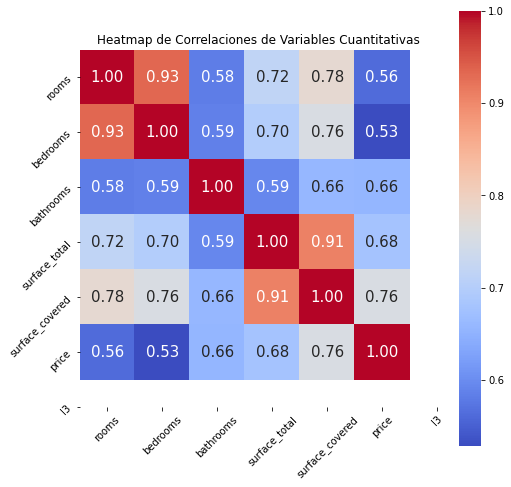

In [55]:
corr = data_pairplot.corr()
plt.figure(figsize=(8,8))

sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data_pairplot.drop(columns='property_type').columns, 
           yticklabels= data_pairplot.drop(columns='property_type').columns,
           cmap= 'coolwarm')
#fmt es cantidad de decimales, annot_kws size es el tama;no de letra de cuadro, 
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Heatmap de Correlaciones de Variables Cuantitativas')
plt.show()

### Escalado de Datos

In [56]:
data=propiedades.copy()

In [60]:
for i in data[['surface_total','rooms','bedrooms','surface_covered','bathrooms','lat','lon']]:
    column=str(i+'_rescalado')
    mean=np.mean(data[i]) #Saco la media
    std=np.std(data[i]) #Saco el desvio estandar
    data[column]=(data[i]-mean)/std #Resto por la media y divido por el desvio
data.head(1)

start_date    end_date  created_on        lat       lon         l1  \
0  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.41211  Argentina   

                l2     l3  rooms  bedrooms  ...  property_type  \
0  Capital Federal  Boedo    2.0       1.0  ...             PH   

   operation_type     price_intervalos  surface_total_rescalado  \
0           Venta  (84800.0, 164100.0]                -0.293751   

  rooms_rescalado bedrooms_rescalado surface_covered_rescalado  \
0       -0.798267          -0.985732                 -0.376389   

  bathrooms_rescalado lat_rescalado lon_rescalado  
0            0.716044     -1.112689      0.643542  

[1 rows x 27 columns]

### Encoding

Vemos cuantos valores distintos tiene cada variable categorica.

In [62]:
for i in ['l1','l2','l3','currency','title','description', 'property_type','operation_type']:
    print(i,'  ',data[i].unique().size)

l1    1
l2    1
l3    57
currency    1
title    35195
description    47529
property_type    3
operation_type    1


**Solo realizaremos encoding sobre l3,property_type**

In [63]:
data_encode=pd.get_dummies(data,columns=['l3','property_type'])

Luego deberemos hacer una limpieza de este dataframe para utilizar en modelos dejando solamente:

- Variables cuantitativas reescaladas
- Variables categoricas dummies (filtrando las que realmente agregan valor)

Reducir la cantidad de columnas generalizando parte de las variables dummies. 


In [65]:
df_model=data_encode[['surface_total_rescalado', 'rooms_rescalado','bedrooms_rescalado', 'surface_covered_rescalado',
       'bathrooms_rescalado', 'lat_rescalado', 'lon_rescalado',
       'price', 'l3_Abasto', 'l3_Agronomía', 'l3_Almagro',
       'l3_Balvanera', 'l3_Barracas', 'l3_Barrio Norte', 'l3_Belgrano',
       'l3_Boca', 'l3_Boedo', 'l3_Caballito', 'l3_Catalinas',
       'l3_Centro / Microcentro', 'l3_Chacarita', 'l3_Coghlan',
       'l3_Colegiales', 'l3_Congreso', 'l3_Constitución', 'l3_Flores',
       'l3_Floresta', 'l3_Las Cañitas', 'l3_Liniers', 'l3_Mataderos',
       'l3_Monserrat', 'l3_Monte Castro', 'l3_Nuñez', 'l3_Once', 'l3_Palermo',
       'l3_Parque Avellaneda', 'l3_Parque Centenario', 'l3_Parque Chacabuco',
       'l3_Parque Chas', 'l3_Parque Patricios', 'l3_Paternal', 'l3_Pompeya',
       'l3_Puerto Madero', 'l3_Recoleta', 'l3_Retiro', 'l3_Saavedra',
       'l3_San Cristobal', 'l3_San Nicolás', 'l3_San Telmo', 'l3_Tribunales',
       'l3_Velez Sarsfield', 'l3_Versalles', 'l3_Villa Crespo',
       'l3_Villa Devoto', 'l3_Villa General Mitre', 'l3_Villa Lugano',
       'l3_Villa Luro', 'l3_Villa Ortuzar', 'l3_Villa Pueyrredón',
       'l3_Villa Real', 'l3_Villa Riachuelo', 'l3_Villa Santa Rita',
       'l3_Villa Soldati', 'l3_Villa Urquiza', 'l3_Villa del Parque',
       'property_type_Casa', 'property_type_Departamento', 'property_type_PH']]

In [67]:
df_model.to_csv('C:/Users/Octavio/Documents/CURSOS/DATA SCIENCE/Proyecto/DS_Proyecto_Datos_Properati_procesados.csv')